Proposal for Group 42

Let's upload our possible datasets in the data folder so we can easily have a look at them and possibly run some functions on them if we need. 

In [2]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
#reads in data as well as turns relevant double columns into factors 

url<- "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"


heart_data <- read_csv(url)%>%
    mutate(sex = as_factor(sex))%>%
    mutate(smoking = as_factor(smoking))%>%
    mutate(DEATH_EVENT = as_factor(DEATH_EVENT))%>%
    mutate(high_blood_pressure = as_factor(high_blood_pressure))%>%
    mutate(diabetes = as_factor(diabetes))%>%
    mutate(anaemia= as_factor(anaemia)) #%>% 
    #select(creatinine_phosphokinase, ejection_fraction, platelets, DEATH_EVENT)


#creates factor levels for columns that make sense with column name 
levels(heart_data$sex)<- c("female","male")
levels(heart_data$smoking)<- c("no","yes")
levels(heart_data$DEATH_EVENT)<- c("died","survived")
levels(heart_data$high_blood_pressure)<- c("no","yes")
levels(heart_data$diabetes)<- c("no","yes")
levels(heart_data$anaemia)<- c("no","yes")


#normalize platelets column so that all values are a fraction of the max value 
max_plat<- max(heart_data$platelets)
heart_data_platelets_norm <- heart_data%>%
    mutate(platelets_norm = platelets/max_plat)%>%
    select(-platelets)%>%
    relocate(platelets_norm, .before = serum_creatinine)

 




Parsed with column specification:
cols(
  age = col_double(),
  anaemia = col_double(),
  creatinine_phosphokinase = col_double(),
  diabetes = col_double(),
  ejection_fraction = col_double(),
  high_blood_pressure = col_double(),
  platelets = col_double(),
  serum_creatinine = col_double(),
  serum_sodium = col_double(),
  sex = col_double(),
  smoking = col_double(),
  time = col_double(),
  DEATH_EVENT = col_double()
)



Possible Predictive Questions
-Does a patient have high blood pressure if they smoke and have diabetes?
-Will a patient experience a death event if they smoke, have high blood pressure and are over 70?
-If a patient smokes and has low platelet(less than 25% of max platelet in study) count will they have anaemia?

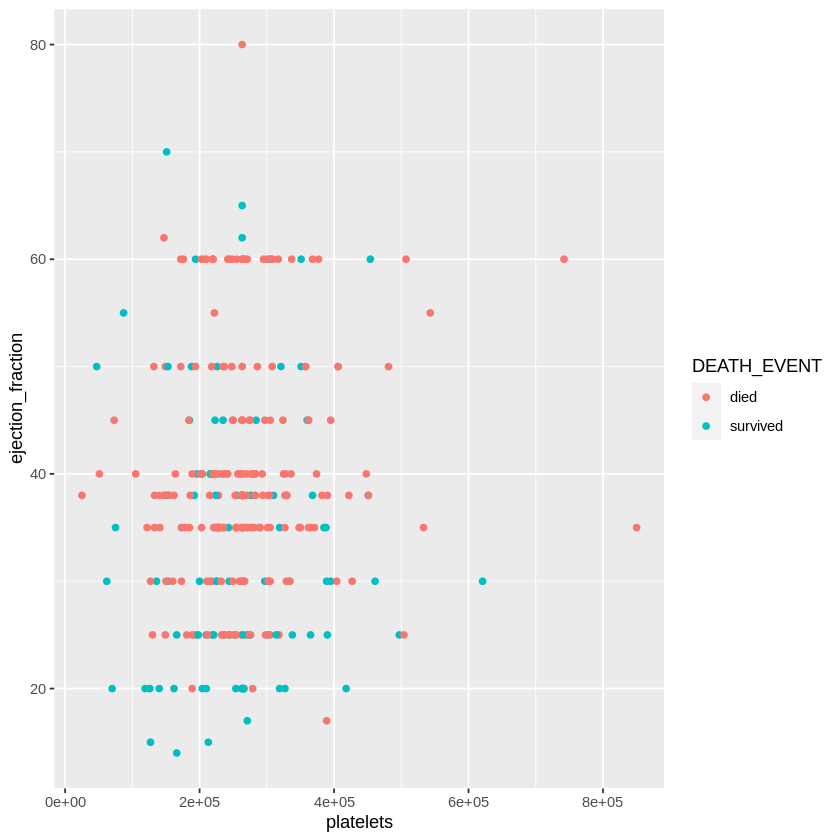

In [4]:
#example question if we were to look at how serum creatinine and ejection fraction can be used as predictors of a death event

serum_data <- heart_data%>%
    ggplot(aes(x = platelets, y = ejection_fraction, color = DEATH_EVENT))+
    geom_point()
    

serum_data

In [5]:
#looking at the percentage of affermatives and negatives for each possible catergorical class to give a reason about why we chose DEATH_EVENT
num_obs <- nrow(heart_data)
anaemia_dist <- heart_data %>% 
  group_by(anaemia) %>% 
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )
diabetes_dist <- heart_data %>% 
  group_by(diabetes) %>% 
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )
bp_dist <- heart_data %>% 
  group_by(high_blood_pressure) %>% 
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )
death_dist <- heart_data %>% 
  group_by(DEATH_EVENT) %>% 
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )

anaemia_dist
diabetes_dist
bp_dist
death_dist

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



anaemia,count,percentage
<fct>,<int>,<dbl>
no,170,56.85619
yes,129,43.14381


diabetes,count,percentage
<fct>,<int>,<dbl>
no,174,58.19398
yes,125,41.80602


high_blood_pressure,count,percentage
<fct>,<int>,<dbl>
no,194,64.88294
yes,105,35.11706


DEATH_EVENT,count,percentage
<fct>,<int>,<dbl>
died,203,67.89298
survived,96,32.10702


The distribution of all categorical classes can be seen above, since range of their distrubutions is within 10, statistically any of them can be chosen as a viable class to predict. However, due to the medical significance and strength of corelation to the features, we decided to choose "DEATH_EVENT" as the class which we will try to predict.

Following this analysis, all other categorical data types were removed from the dataframe. 

In [6]:
heart_select(-anaemia, -diabetes, -high_blood_pressure)


ERROR: Error in heart_select(-anaemia, -diabetes, -high_blood_pressure): could not find function "heart_select"


Expected outcomes and significance

We expect to find that serum creatine, and ejection fraction can accuratly predict if a patient who has already suffered heart failure is likely to survive in the following days. By taking these predictors and applying them to new patients who have suffered heart failure we can make accurate predictions about what the this patients survival in the following days after their heart failure. This can help hospitals identify which patients will need special care and treatment in the following days after heart failure in order to increase chance of survival. Future studies may want to recreate this study in other datasets as well as use larger datasets in order to improve reliability. They may also want to look at these variables as predictors for other diseases and illnesses such as renal failure and high blood pressure.
